### Text Preprocessing Code

#### Create Datasets

In [123]:
import pandas as pd
import spacy

# create a list of sentences
data = [
    "When life gives you lemons, make lemonade! 🙂",
    "She bought 2 lemons for $1 at Maven Market.",
    "A dozen lemons will make a gallon of lemonade. [AllRecipes]",
    "lemon, lemon, lemons, lemon, lemon, lemons",
    "He's running to the market to get a lemon — there's a great sale today.",
    "Does Maven Market carry Eureka lemons or Meyer lemons?",
    "An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]",
    "iced tea is my favorite"
]

In [124]:
pd.set_option('display.max_colwidth', None)

In [125]:
data_df = pd.DataFrame(data=data, columns=['sentence'])

In [126]:
data_df

,sentence
0,"When life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.
2,A dozen lemons will make a gallon of lemonade. [AllRecipes]
3,"lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — there's a great sale today.
5,Does Maven Market carry Eureka lemons or Meyer lemons?
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]"
7,iced tea is my favorite


In [127]:
test = [
    "We're going to start this course with traditional NLP applications.",
    "Then we'll move on to modern NLP theory.",
    "Finally, we'll wrap things up with modern NLP applications."
]

test_series = pd.Series(test)
test_series

0    We're going to start this course with traditional NLP applications.
1                               Then we'll move on to modern NLP theory.
2            Finally, we'll wrap things up with modern NLP applications.
dtype: object

In [128]:
df = data_df.copy()
df

,sentence
0,"When life gives you lemons, make lemonade! 🙂"
1,She bought 2 lemons for $1 at Maven Market.
2,A dozen lemons will make a gallon of lemonade. [AllRecipes]
3,"lemon, lemon, lemons, lemon, lemon, lemons"
4,He's running to the market to get a lemon — there's a great sale today.
5,Does Maven Market carry Eureka lemons or Meyer lemons?
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]"
7,iced tea is my favorite


In [129]:
def lower_replace(series):
    return series.str.lower().replace(r'\[.*?\]', '', regex=True).replace(r'[^\w\s]','', regex=True)

In [130]:
df['clean_sentence'] = lower_replace(df['sentence'])

In [131]:
df

,sentence,clean_sentence
0,"When life gives you lemons, make lemonade! 🙂",when life gives you lemons make lemonade
1,She bought 2 lemons for $1 at Maven Market.,she bought 2 lemons for 1 at maven market
2,A dozen lemons will make a gallon of lemonade. [AllRecipes],a dozen lemons will make a gallon of lemonade
3,"lemon, lemon, lemons, lemon, lemon, lemons",lemon lemon lemons lemon lemon lemons
4,He's running to the market to get a lemon — there's a great sale today.,hes running to the market to get a lemon theres a great sale today
5,Does Maven Market carry Eureka lemons or Meyer lemons?,does maven market carry eureka lemons or meyer lemons
6,"An Arnold Palmer is half lemonade, half iced tea. [Wikipedia]",an arnold palmer is half lemonade half iced tea
7,iced tea is my favorite,iced tea is my favorite


In [132]:
cp_test_series = lower_replace(test_series)

In [133]:
cp_test_series

0    were going to start this course with traditional nlp applications
1                               then well move on to modern nlp theory
2             finally well wrap things up with modern nlp applications
dtype: object

In [134]:
df_children_books = pd.read_csv('./Data/childrens_books.csv')

In [135]:
df_children_books.head()

,Ranking,Title,Author,Year,Rating,Description
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story."
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education."
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice."
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers."
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making it a beloved classic for sleep-time reading."


In [136]:
df_children_books.Description

0                         Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.
1                               The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.
2          The Giving Tree is a touching and bittersweet story about a tree that gives everything it

In [137]:
df_children_books['Description_clean'] = lower_replace(df_children_books.Description)

In [138]:
df_children_books.head()

,Ranking,Title,Author,Year,Rating,Description,Description_clean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",the very hungry caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly eric carles use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers the simple engaging story introduces children to days of the week counting and the concept of metamorphosis its a staple in early childhood education
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice.",the giving tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life as the boy grows up he takes more from the tree and the tree continues to give even when it has little left silversteins minimalist text and illustrations convey deep themes of unconditional love selflessness and the passage of time it has sparked much discussion about relationships and sacrifice
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers.",in green eggs and ham samiam tries to convince a reluctant character to try a dish of green eggs and ham despite his resistance through repetition and rhyme dr seusss classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone the playful illustrations and humorous dialogue make it a fun and educational read for young readers
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making

### Text preprocessing using spaCy

In [139]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [140]:
def token_lemma_nonstop(text: str) -> str:
    return ' '.join([token.lemma_ for token in nlp(text) if not token.is_stop])

In [141]:
token_lemma_nonstop(df.clean_sentence[0])

'life give lemon lemonade'

In [142]:
test_series.apply(token_lemma_nonstop)

0    go start course traditional NLP application .
1                              modern NLP theory .
2    finally , wrap thing modern NLP application .
dtype: object

In [143]:
pharse2 = lower_replace(df.sentence).apply(token_lemma_nonstop)[0]
pharse2

'life give lemon lemonade'

In [144]:
doc2 = nlp(pharse2)

In [145]:
[(token.text, token.pos_) for token in doc2 if token.pos_ in ['NOUN', 'PRON']]

[('life', 'NOUN'), ('lemon', 'NOUN'), ('lemonade', 'NOUN')]

In [146]:
def filterin_pos(text: str, pos_list: list = ['NOUN', 'PRON']):
    return ' '.join([ token.text for token in nlp(text=text) if token.pos_ in pos_list])

In [147]:
test_series.apply(filterin_pos)

0    We course applications
1                 we theory
2    we things applications
dtype: object

In [148]:
lower_replace(df.sentence).apply(token_lemma_nonstop).apply(filterin_pos)

0                    life lemon lemonade
1                     lemon maven market
2                     dozen lemon gallon
3    lemon lemon lemon lemon lemon lemon
4                market lemon sale today
5                           market lemon
6      palmer half lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

``````````

### NLP pipeline

In [149]:
def nlp_pipeline(series):
    output = lower_replace(series)
    return output.apply(token_lemma_nonstop).apply(filterin_pos)

In [150]:
nlp_pipeline(test_series)

0          nlp application
1               nlp theory
2    thing nlp application
dtype: object

In [151]:
test_clean = nlp_pipeline(df.sentence)
test_clean

0                    life lemon lemonade
1                     lemon maven market
2                     dozen lemon gallon
3    lemon lemon lemon lemon lemon lemon
4                market lemon sale today
5                           market lemon
6      palmer half lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [152]:
pd.to_pickle(test_clean, 'test_clean.pkl')

In [153]:
import spacy
nlp = spacy.load('en_core_web_sm')
desc = df_children_books.Description_clean.iloc[0].replace('\xa0', ' ')

In [154]:
desc

'where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story'

In [155]:
doc = nlp(desc)
doc

where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story

In [156]:
[token.lemma_ for token in doc if not token.is_stop][:10]

['wild',
 'thing',
 'follow',
 'max',
 'young',
 'boy',
 'send',
 'room',
 'misbehave',
 'imago']

In [157]:
df_children_books['Description_clean'] = df_children_books.Description_clean.apply(token_lemma_nonstop)

In [158]:
series = pd.read_pickle('test_clean.pkl')
series

0                    life lemon lemonade
1                     lemon maven market
2                     dozen lemon gallon
3    lemon lemon lemon lemon lemon lemon
4                market lemon sale today
5                           market lemon
6      palmer half lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [159]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
dtm = cv.fit_transform(series)

In [160]:
dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())

In [161]:
dtm_df

,dozen,favorite,gallon,half,ice,lemon,lemonade,life,market,maven,palmer,sale,tea,today
0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,6,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,1,0,1
5,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,0,0,0,2,1,0,1,0,0,0,1,0,1,0
7,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [162]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=.2, max_df=.8)
dtm2 = cv.fit_transform(series)
dtm_df2 = pd.DataFrame(dtm2.toarray(), columns=cv.get_feature_names_out())
dtm_df2

,ice,ice tea,lemon,lemonade,market,market lemon,tea
0,0,0,1,1,0,0,0
1,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,6,0,0,0,0
4,0,0,1,0,1,1,0
5,0,0,1,0,1,1,0
6,1,1,0,1,0,0,1
7,1,1,0,0,0,0,1


In [163]:
term_freq = dtm_df2.sum()
term_freq

ice              2
ice tea          2
lemon           11
lemonade         2
market           3
market lemon     2
tea              2
dtype: int64

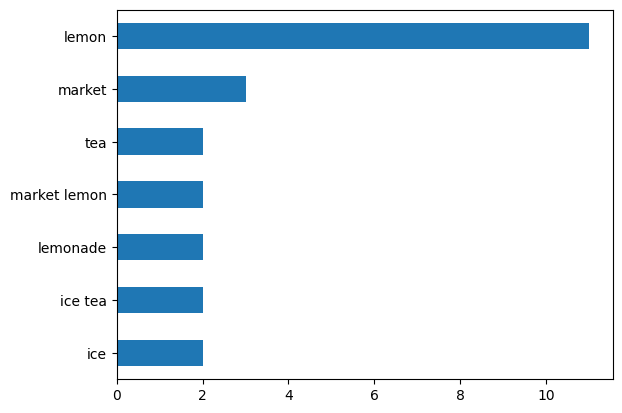

In [164]:
term_freq.sort_values().plot(kind='barh');

In [165]:
df_children_books.head(2)

,Ranking,Title,Author,Year,Rating,Description,Description_clean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",wild thing follow max young boy send room misbehave imago sail island fill wild creature king max tame beast eventually return home find supper wait iconic book explore theme imagination adventure complex emotion childhood capture sendak whimsical illustration story
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",hungry caterpillar tell story caterpillar eat variety food eventually butterfly eric carle use colorful collage illustration rhythmic text book beloved classic young reader simple engaging story introduce child day week counting concept metamorphosis staple early childhood education


In [166]:
cv = CountVectorizer(stop_words='english', min_df=.1)
dtm = cv.fit_transform(df_children_books.Description_clean)
dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
top_terms =dtm_df.sum().sort_values().tail(10)
top_terms

explore          30
theme            33
classic          36
adventure        39
reader           54
illustration     54
young            64
child            66
book             75
story           104
dtype: int64

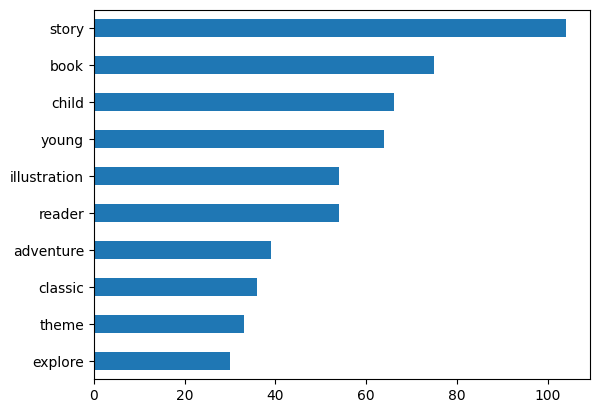

In [167]:
top_terms.plot(kind='barh');

In [177]:
series

0                    life lemon lemonade
1                     lemon maven market
2                     dozen lemon gallon
3    lemon lemon lemon lemon lemon lemon
4                market lemon sale today
5                           market lemon
6      palmer half lemonade half ice tea
7                       ice tea favorite
Name: sentence, dtype: object

In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
tfidf = tv.fit_transform(series)
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tv.get_feature_names_out())

In [180]:
tfidf_df

,dozen,favorite,gallon,half,ice,lemon,lemonade,life,market,maven,palmer,sale,tea,today
0,0.00000,0.000000,0.00000,0.00000,0.000000,0.357659,0.599839,0.715732,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.00000,0.00000,0.000000,0.375318,0.000000,0.000000,0.543168,0.75107,0.000000,0.000000,0.000000,0.000000
2,0.66671,0.000000,0.66671,0.00000,0.000000,0.333162,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.00000,0.00000,0.000000,0.300100,0.000000,0.000000,0.434311,0.00000,0.000000,0.600547,0.000000,0.600547
5,0.00000,0.000000,0.00000,0.00000,0.000000,0.568471,0.000000,0.000000,0.822704,0.00000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.00000,0.75021,0.314367,0.000000,0.314367,0.000000,0.000000,0.00000,0.375105,0.000000,0.314367,0.000000
7,0.00000,0.644859,0.00000,0.00000,0.540443,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.540443,0.000000


In [183]:

tv2 = TfidfVectorizer(stop_words='english', min_df=.1, max_df=.5)
tfidf2 = tv2.fit_transform(df_children_books.Description_clean)
tfidf_df2 = pd.DataFrame(tfidf2.toarray(), columns=tv2.get_feature_names_out())
tfidf_df2

,adventure,beloved,boy,character,charming,classic,courage,early,embark,engage,...,simple,tale,teach,tell,text,theme,timeless,way,whimsical,world
0,0.306065,0.000000,0.436081,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.310439,0.000000,0.000000,0.436081,0.000000
1,0.000000,0.357193,0.000000,0.000000,0.0,0.273303,0.000000,0.438717,0.0,0.0,...,0.344196,0.000000,0.000000,0.301902,0.415937,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.695432,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.356375,0.247534,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.379862,0.0,0.273669,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.418150,0.000000,0.000000,0.0,0.319944,0.000000,0.000000,0.0,0.0,...,0.402935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.0,0.607668,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
96,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.463859,0.000000,0.474868,0.000000
97,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.336742,0.000000,0.000000,0.000000,0.462063
98,0.310365,0.000000,0.000000,0.000000,0.0,0.000000,0.465112,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.314801,0.000000,0.000000,0.000000,0.000000


In [189]:
top_5 = tfidf_df2.sum().sort_values().tail(10)

<Axes: >

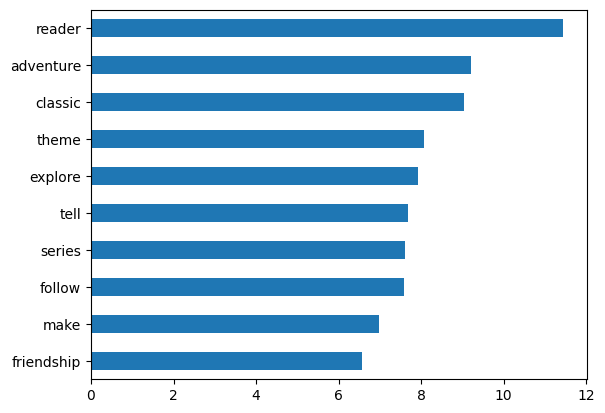

In [190]:
top_5.plot(kind='barh')